In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:

color = sn.color_palette()
sn.set_style("ticks")
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [67]:
df2 = df.copy()
df2['HeartDisease'].replace({'Yes':1,'No':0},inplace=True)
df2['Smoking'].replace({'Yes':3,'No':2},inplace=True)
df2['AlcoholDrinking'].replace({'Yes':3,'No':2},inplace=True)
df2['Stroke'].replace({'Yes':3,'No':2},inplace=True)
df2['DiffWalking'].replace({'Yes':3,'No':2},inplace=True)
df2['Sex'].replace({'Male':3,'Female':2},inplace=True)
df2['Diabetic'].replace({'Yes':3,'No':2,'No, borderline diabetes':4,'Yes (during pregnancy)':5},inplace=True)
df2['PhysicalActivity'].replace({'Yes':3,'No':2},inplace=True)
df2['Asthma'].replace({'Yes':3,'No':2},inplace=True)
df2['KidneyDisease'].replace({'Yes':3,'No':2},inplace=True)
df2['SkinCancer'].replace({'Yes':3,'No':2},inplace=True)
df2['AgeCategory'].replace({'18-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9,'60-64':10,'65-69':11,'70-74':12,'75-79':13,'80 or older':14},inplace=True)
df2['Race'].replace({'White':2,'Black':3,'Asian':4,'American Indian/Alaskan Native':5,'Other':6,'Hispanic':7},inplace=True)
df2['GenHealth'].replace({'Very good':2,'Fair':3,'Good':4,'Poor':5,'Excellent':6},inplace=True)



In [31]:
df['Sex'].value_counts()

Female    167805
Male      151990
Name: Sex, dtype: int64

In [8]:
df['KidneyDisease'].value_counts()

No     308016
Yes     11779
Name: KidneyDisease, dtype: int64

In [9]:
df['SkinCancer'].value_counts()

No     289976
Yes     29819
Name: SkinCancer, dtype: int64

In [10]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [5]:
HD = df[df['HeartDisease']=='Yes']
nHD = df[df['HeartDisease']=='No']

In [32]:
HD['Race'].value_counts()

White                             22507
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
Name: Race, dtype: int64

<AxesSubplot: ylabel='Frequency'>

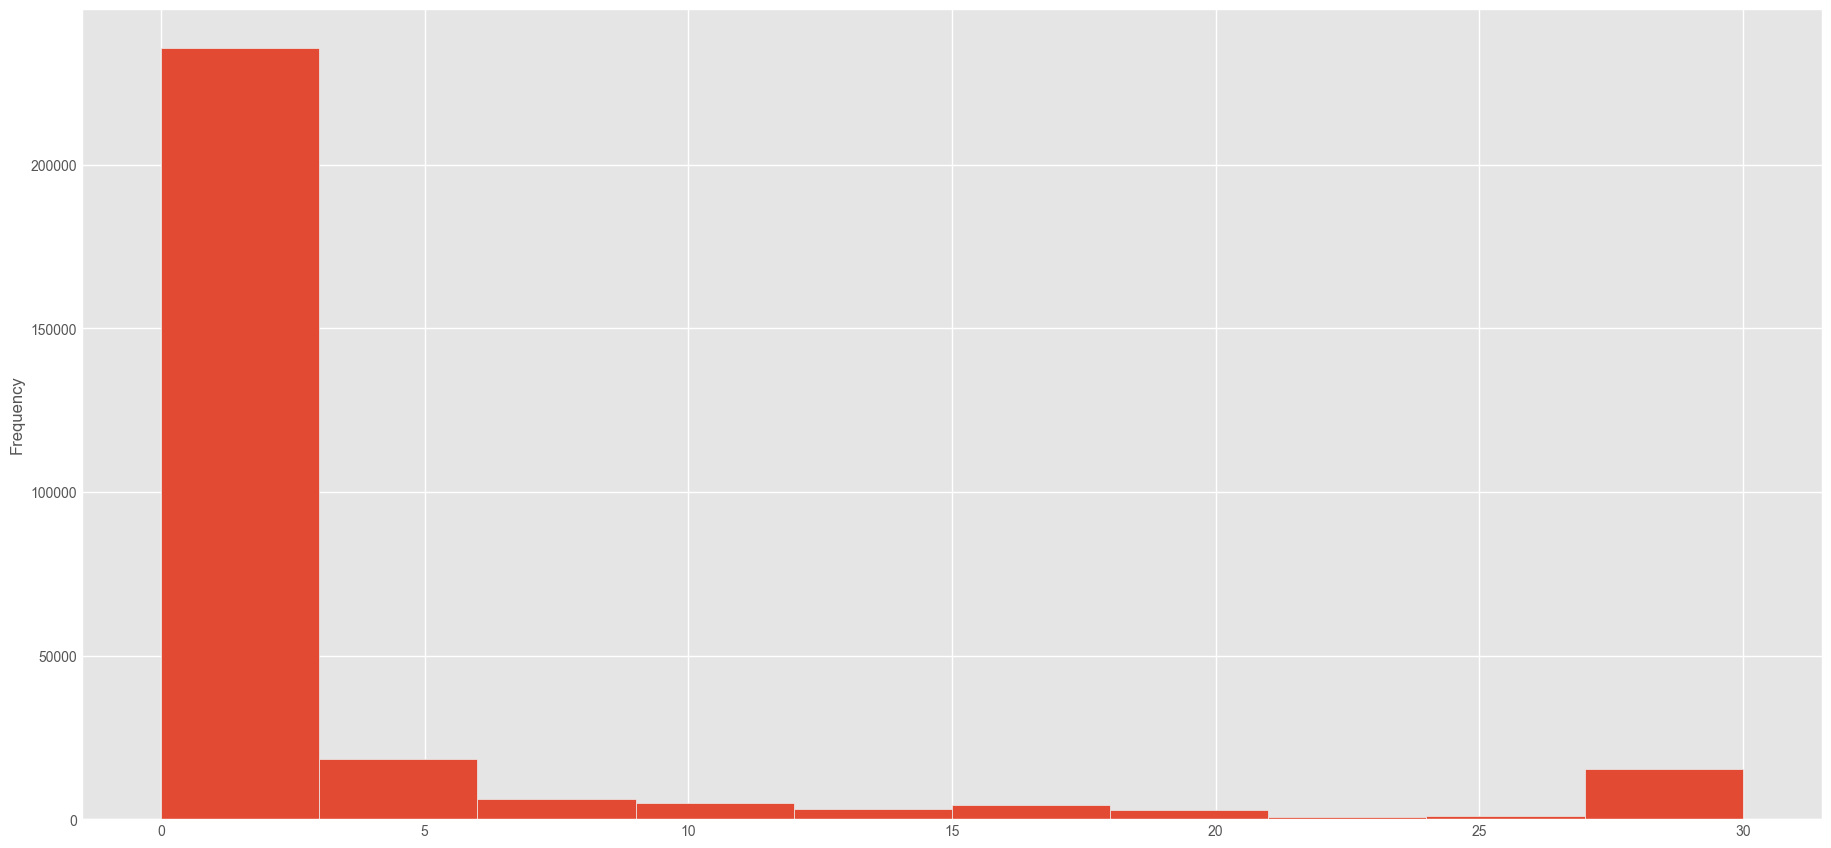

In [36]:
nHD['PhysicalHealth'].plot.hist()

In [6]:
HD_BMI = HD['BMI']
non_HD_BMI = nHD['BMI']

In [90]:
HD_BMI.var()

43.25891251706718

In [91]:
non_HD_BMI.var()

40.01397605648833

<Figure size 2000x1000 with 0 Axes>

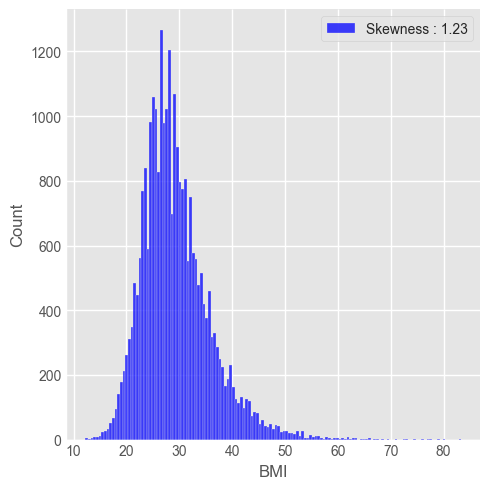

In [15]:
plt.figure(figsize=(20,10))
ax = sn.displot(HD_BMI,label='Skewness : %.2f'%HD_BMI.skew(),color='blue')
# ax = sn.displot(HD_BMI,label='Kurtosis : %.2f'%HD_BMI.kurtosis(),color='blue')
plt.legend()

C:\Users\valse\AppData\Local\Temp\ipykernel_14788\1135197353.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(HD_BMI,color='blue',label='Skewness : %.2f'%HD_BMI.skew())


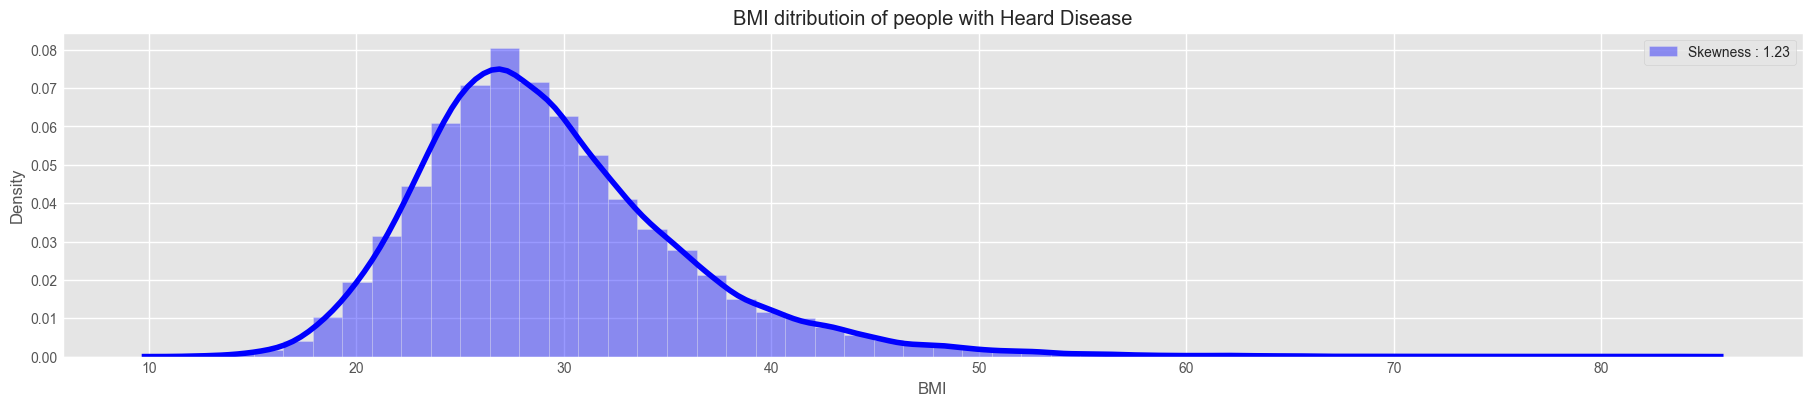

In [25]:
plt.figure(figsize=(20,4))
sn.distplot(HD_BMI,color='blue',label='Skewness : %.2f'%HD_BMI.skew())
plt.title('BMI ditributioin of people with Heard Disease')
plt.legend()

# features = ['trestbps','chol','oldpeak','thalach']
# plt.figure(figsize=(20,10))

# for i in range(1, 5):
#     ax=plt.subplot(2, 2, i)
#     ax=sn.distplot(data[features[i-1]],label='Skewness : %.2f'%data[features[i-1]].skew(),color='blue')
#     ax=sn.distplot(data[features[i-1]],label='Kurtosis : %.2f'%data[features[i-1]].kurtosis())

#     plt.legend(loc='best')

C:\Users\valse\AppData\Local\Temp\ipykernel_14788\2539802100.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(non_HD_BMI,color='blue',label='Skewness : %.2f'%non_HD_BMI.skew())


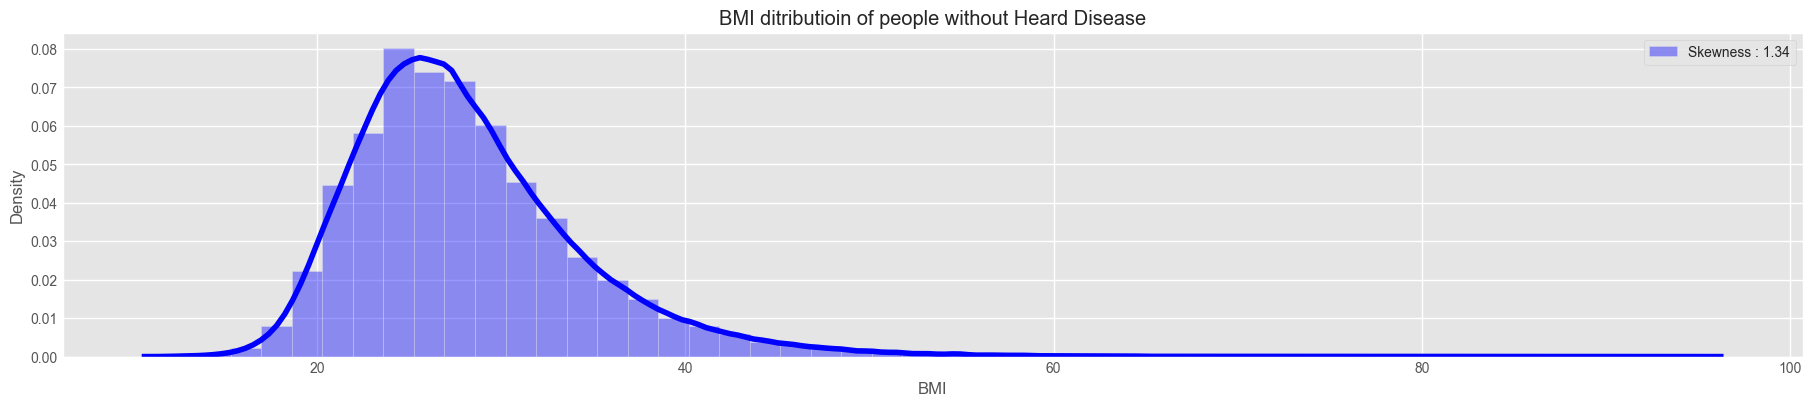

In [26]:
plt.figure(figsize=(20,4))
sn.distplot(non_HD_BMI,color='blue',label='Skewness : %.2f'%non_HD_BMI.skew())
plt.title('BMI ditributioin of people without Heard Disease')
plt.legend()

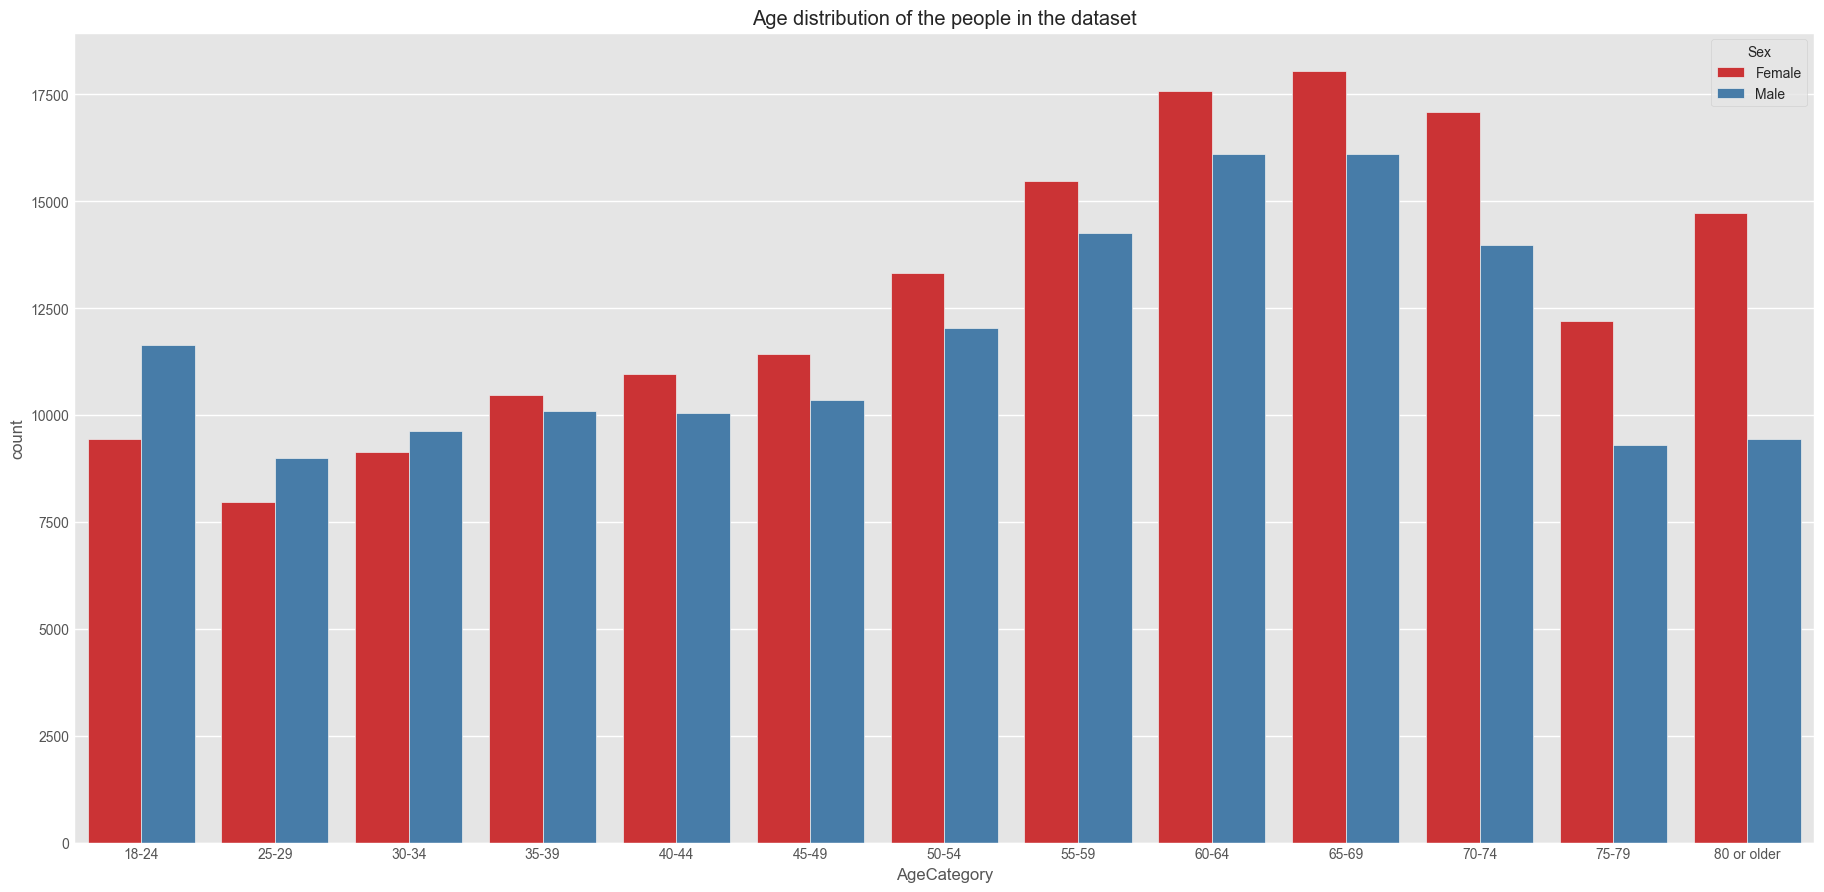

In [30]:
ageCategorySort =['18-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79', '80 or older']
plt.rcParams["figure.figsize"]=[20,10]
sn.countplot(x="AgeCategory", hue="Sex", data=df, palette="Set1", order = ageCategorySort)
plt.title('Age distribution of the people in the dataset')

plt.draw()

# plt.figure(figsize=(20,4))
# sn.distplot(HD['AgeCategory'],color='blue',label='Skewness : %.2f'%HD['AgeCategory'].skew())
# plt.legend()

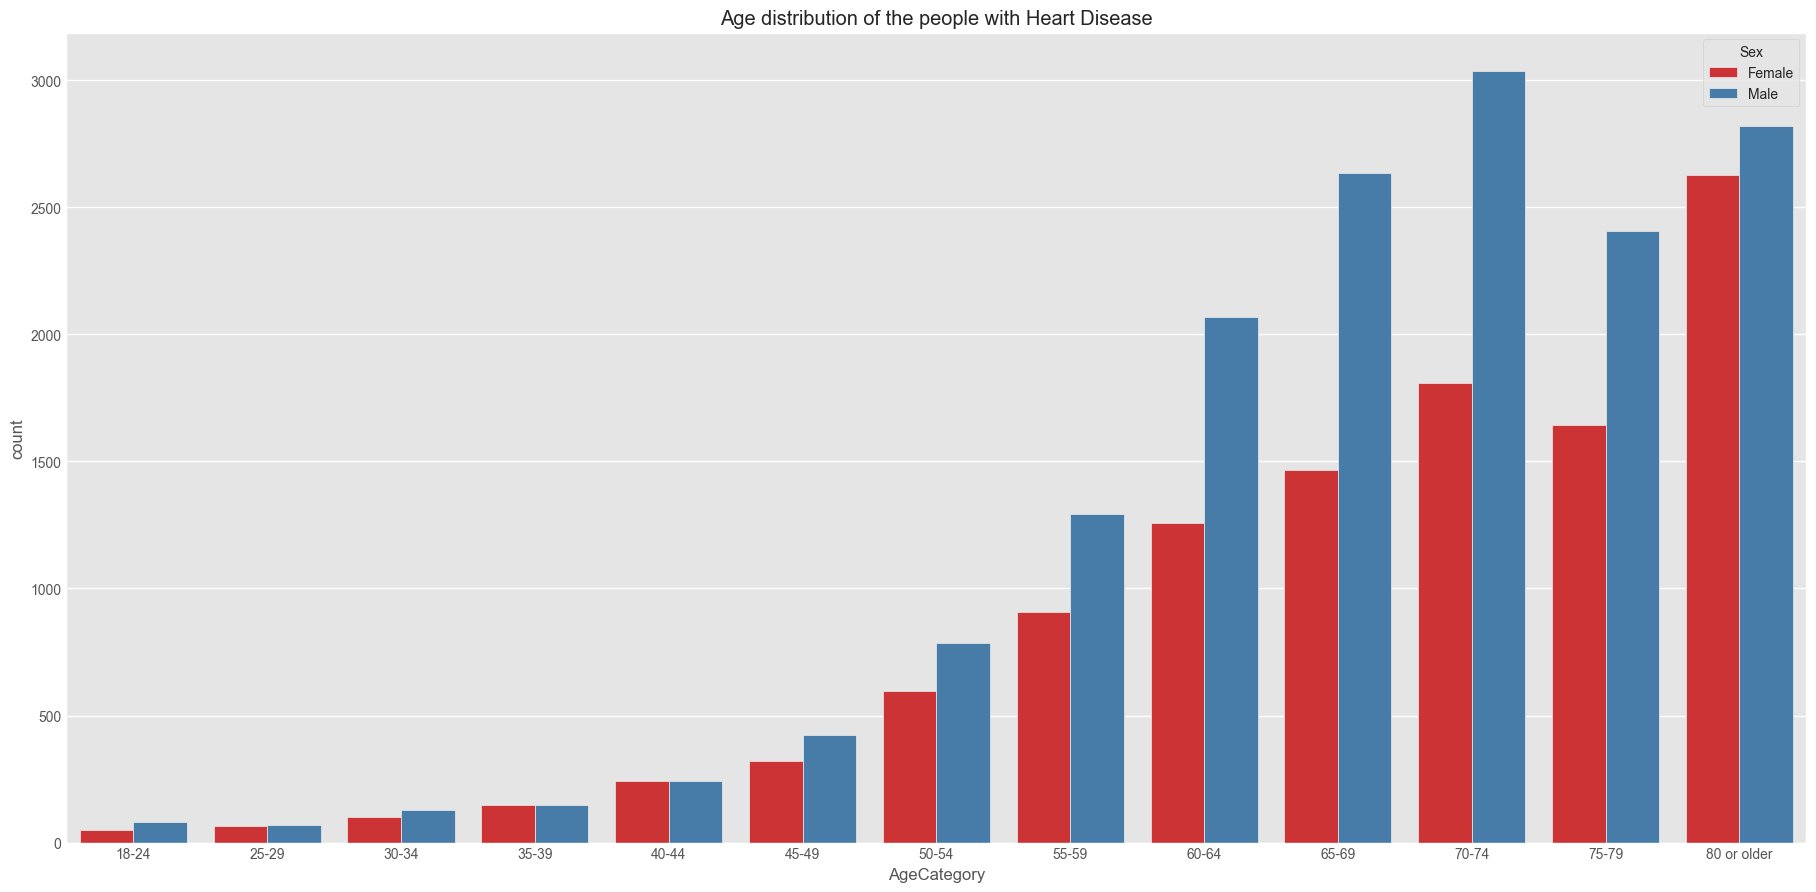

In [27]:
ageCategorySort =['18-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79', '80 or older']
plt.rcParams["figure.figsize"]=[20,10]
sn.countplot(x="AgeCategory", hue="Sex", data=HD, palette="Set1", order = ageCategorySort)
plt.title('Age distribution of the people with Heart Disease')
plt.draw()

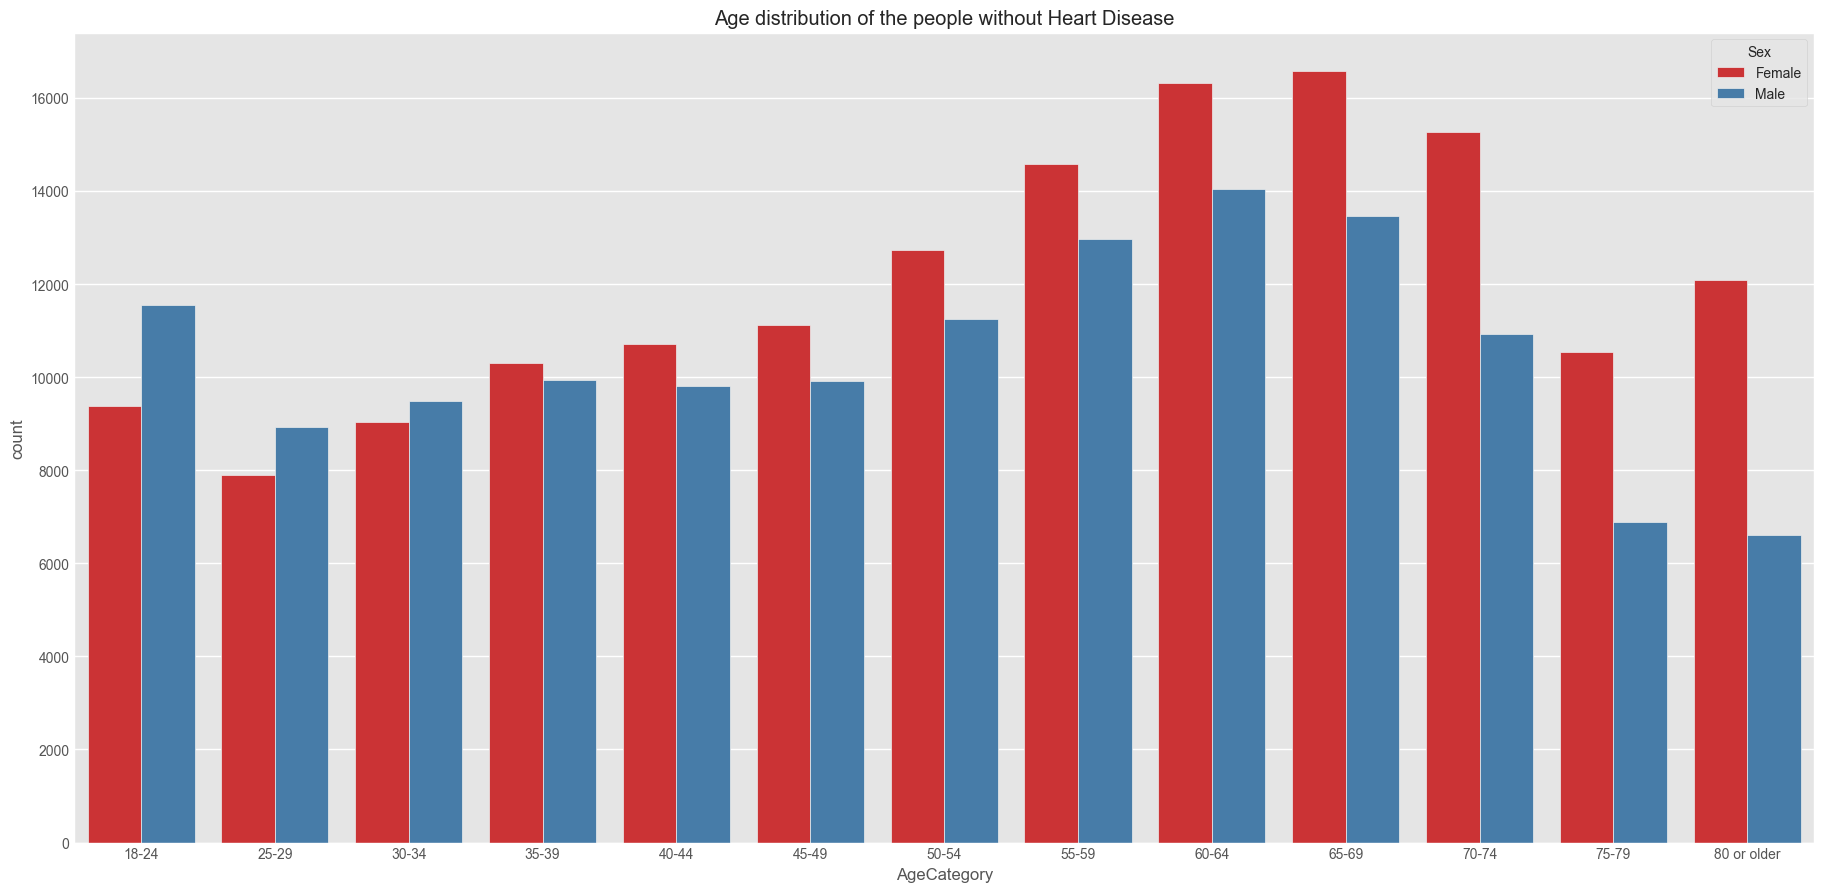

In [29]:
ageCategorySort =['18-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79', '80 or older']
plt.rcParams["figure.figsize"]=[20,10]
sn.countplot(x="AgeCategory", hue="Sex", data=nHD, palette="Set1", order = ageCategorySort)
plt.title('Age distribution of the people without Heart Disease')
plt.draw()

In [64]:
nHD_sample = nHD.sample(n=27373, random_state=1)
nHD_sample

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
56961,No,23.75,Yes,No,No,5.0,0.0,Yes,Male,50-54,White,No,No,Fair,8.0,No,No,No
262323,No,30.18,No,No,No,0.0,0.0,No,Female,65-69,Hispanic,No,No,Very good,7.0,No,No,No
9861,No,28.89,No,Yes,No,0.0,30.0,Yes,Male,40-44,Hispanic,No,Yes,Excellent,6.0,No,No,No
305687,No,44.93,Yes,No,No,15.0,30.0,Yes,Female,45-49,White,No,No,Poor,5.0,Yes,No,No
306010,No,21.26,Yes,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222411,No,36.26,Yes,No,No,0.0,0.0,No,Male,65-69,White,No,No,Very good,8.0,No,No,No
57372,No,32.49,Yes,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Very good,5.0,No,No,No
47794,No,22.38,Yes,No,No,0.0,0.0,No,Male,80 or older,White,No,Yes,Fair,8.0,No,Yes,Yes
193368,No,28.34,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Very good,7.0,No,No,No


In [41]:
HD.shape[0]

27373

In [56]:
stats.ttest_ind(HD['BMI'],nHD_sample['BMI'],equal_var=False)

Ttest_indResult(statistic=20.88387159980566, pvalue=1.7900014422022654e-96)

In [52]:
stats.ttest_rel(HD['BMI'],nHD_sample['BMI']) #paired t test

Ttest_relResult(statistic=20.91900389186586, pvalue=2.0454481263022392e-96)

C:\Users\valse\AppData\Local\Temp\ipykernel_14788\3617473801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(nHD_sample['BMI'])
C:\Users\valse\AppData\Local\Temp\ipykernel_14788\3617473801.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(HD['BMI'])
No artists with labels found to put in leg

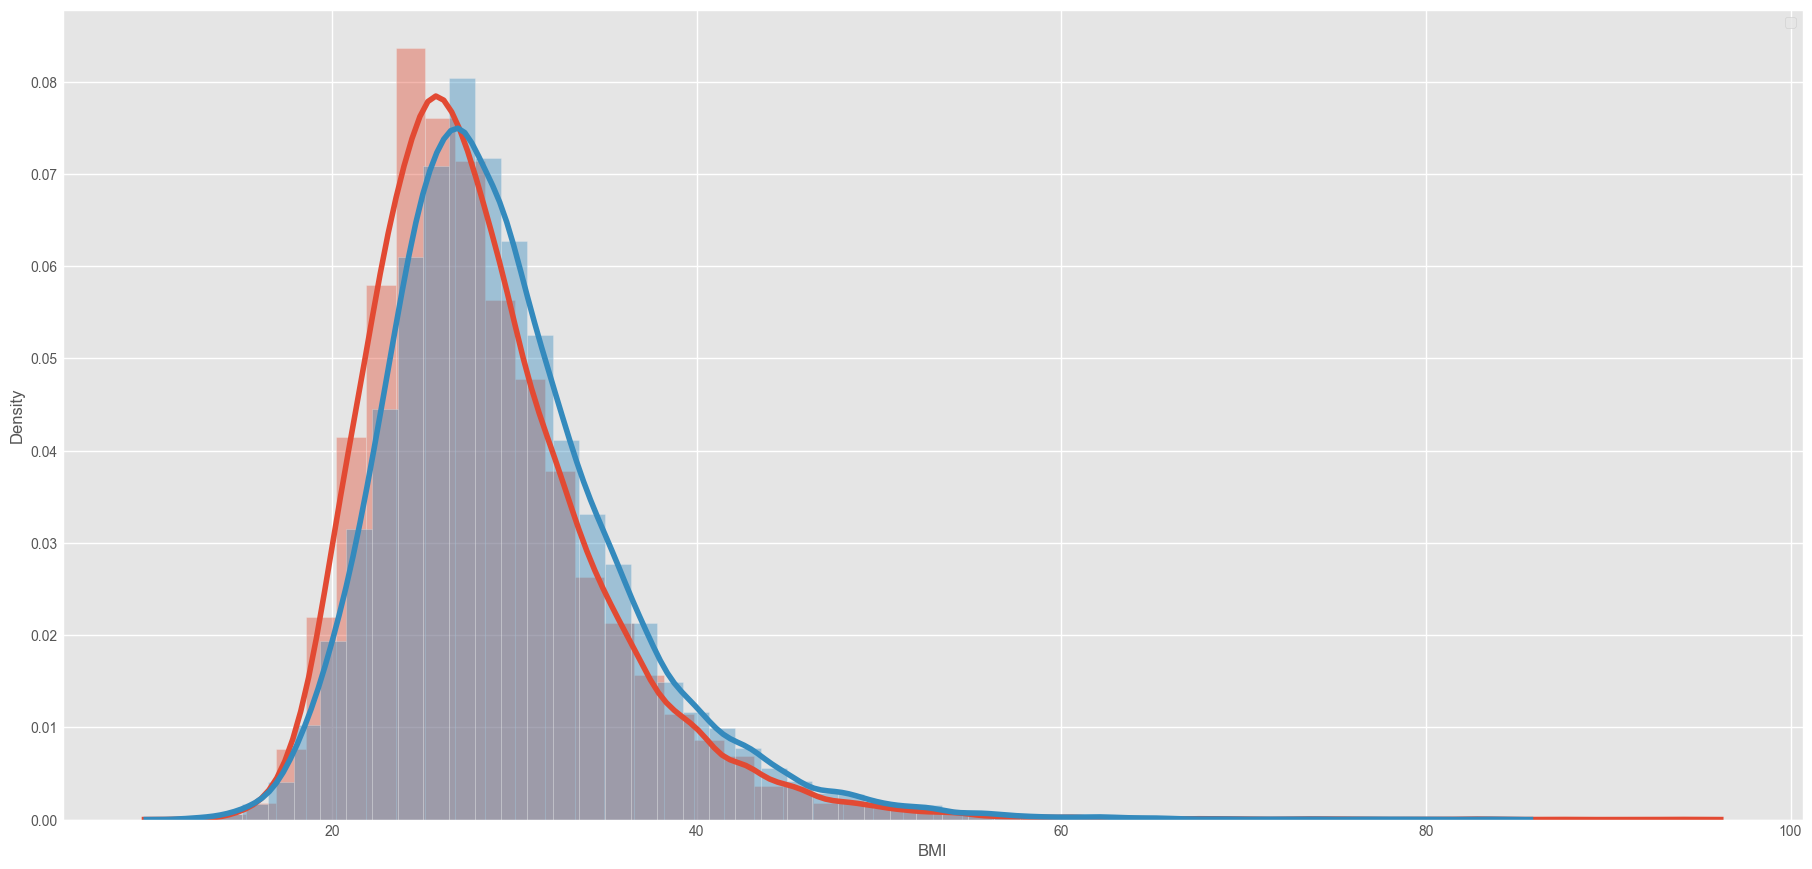

In [65]:
sn.distplot(nHD_sample['BMI'])
sn.distplot(HD['BMI'])
plt.legend()

C:\Users\valse\AppData\Local\Temp\ipykernel_14788\2781608789.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(nHD_num_spl['AgeCategory'])
C:\Users\valse\AppData\Local\Temp\ipykernel_14788\2781608789.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(HD_num['AgeCategory'])
No artists with label

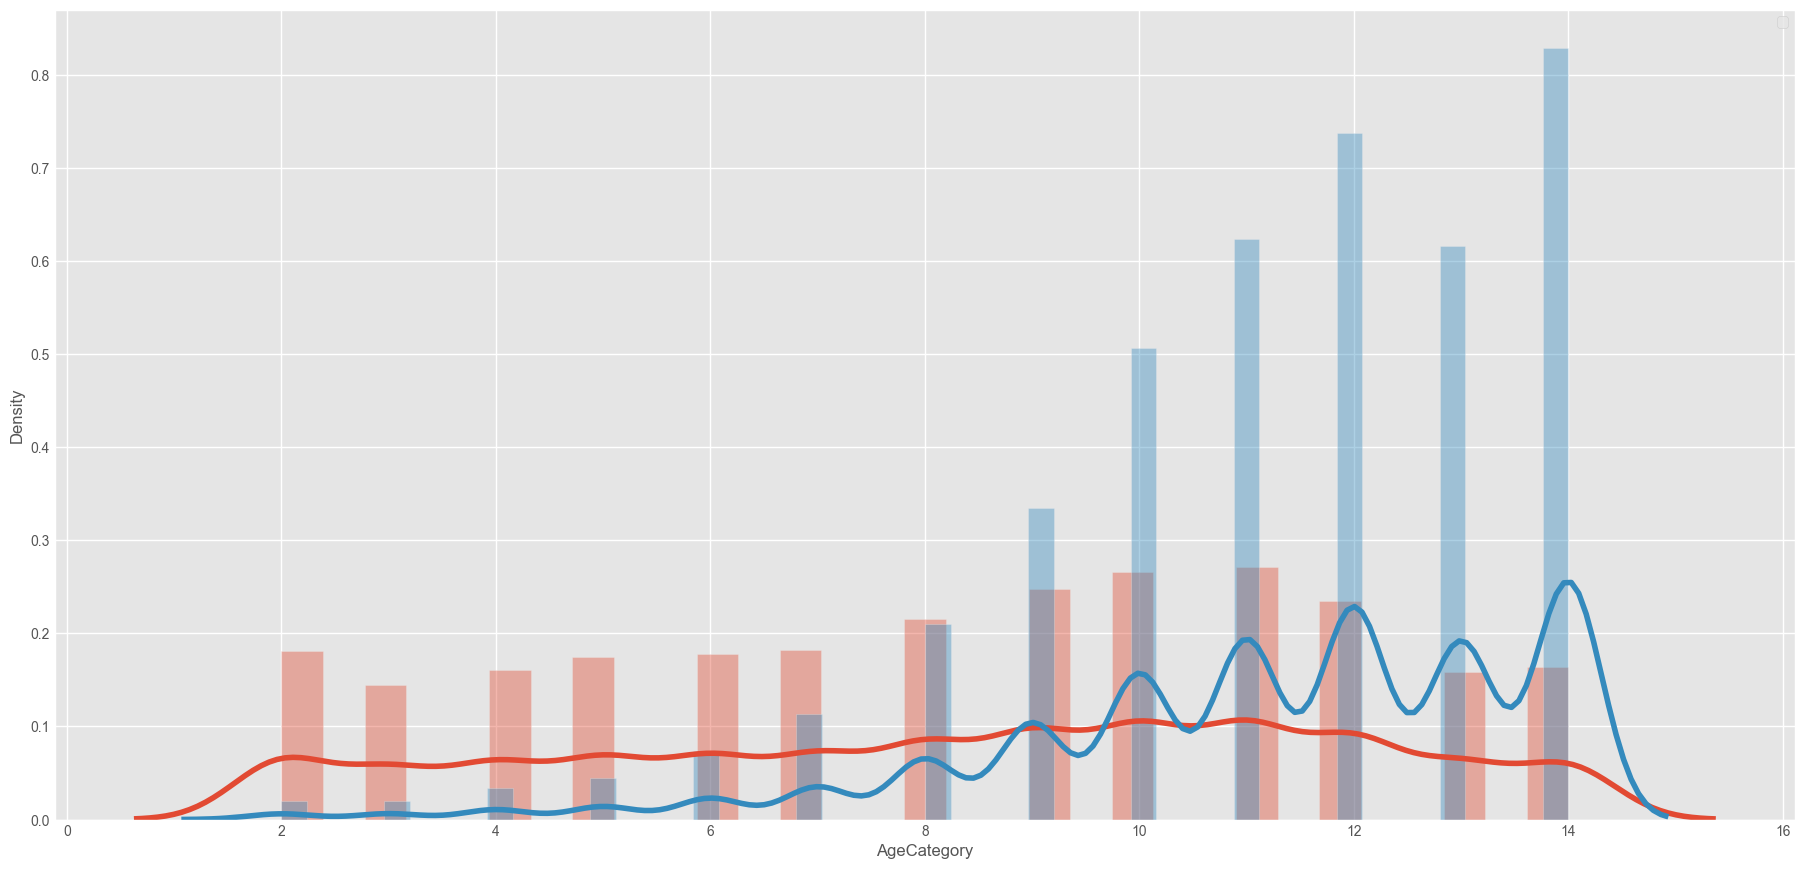

In [68]:
HD_num = df2[df2['HeartDisease']==1]
nHD_num = df2[df2['HeartDisease']==0]
nHD_num_spl = nHD_num.sample(n=27373, random_state=1)
sn.distplot(nHD_num_spl['AgeCategory'])
sn.distplot(HD_num['AgeCategory'])
plt.legend()

In [69]:
df_append =HD.append(nHD_sample, ignore_index=False, verify_integrity=False, sort=None)

C:\Users\valse\AppData\Local\Temp\ipykernel_14788\3468755866.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append =HD.append(nHD_sample, ignore_index=False, verify_integrity=False, sort=None)
C:\Users\valse\AppData\Local\Temp\ipykernel_14788\3468755866.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_append =HD.append(nHD_sample, ignore_index=False, verify_integrity=False, sort=None)


In [72]:
df_append_num = HD_num.append(nHD_num_spl, ignore_index=False, verify_integrity=False, sort=None)

C:\Users\valse\AppData\Local\Temp\ipykernel_14788\2666767604.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append_num = HD_num.append(nHD_num_spl, ignore_index=False, verify_integrity=False, sort=None)
C:\Users\valse\AppData\Local\Temp\ipykernel_14788\2666767604.py:1: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_append_num = HD_num.append(nHD_num_spl, ignore_index=False, verify_integrity=False, sort=None)


In [82]:
class VizData:
    def __init__(self, df, ccol, ft_1, ft_2):
        if type(df) == pd.core.frame.DataFrame \
            and ccol in df.columns \
            and type(ft_1) == type(ft_2) == str:
            self.df = df
            self.ft1 = ft_1
            self.ft2 = ft_2
            self.ccol = ccol
        
    # Visualisation for columns with binary values
    def binviz(self, col, idx,
                  heat_title,
                  don_all_labels, don_all_title= "Main Pie Chart",
                  don_one_title= "Pie Chart 1",
                  don_two_title= "Pie Chart 2",
                  fig_size= (9, 7),
                  binv= ["No", "Yes"]):
        if col in self.df.columns \
                and self.df[col].nunique() == 2 \
                and isinstance(idx, list) \
                and len(idx) == 2 \
                and isinstance(fig_size, tuple) \
                and len(fig_size) == 2 \
                and all(isinstance(k, int) and k > 0 for k in fig_size) \
                and isinstance(don_all_labels, list) \
                and all(isinstance(lab, str) for lab in don_all_labels) \
                and len(don_all_labels) == 4 \
                and all(isinstance(tit, str)
                        for tit in [heat_title,
                                    don_all_title,
                                    don_one_title,
                                    don_two_title]
                       ):
            sn.set_style("dark")
            m_row, n_col = 2, 2
            fig = plt.figure(figsize= (n_col * fig_size[0], m_row * fig_size[1]))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # heatmap
            heat_df = pd.DataFrame(
                                    {self.ft1: [len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[0])])
                                               ],
                                     self.ft2: [len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[0])])
                                               ]
                                    }, index= idx)
            ax_00 = sn.heatmap(heat_df, linewidth= 0.1,
                                annot= True, fmt= "d",
                                cmap= "Reds", ax= ax[0][0])
            ax_00.set_title(heat_title, pad= 12)
            
            # Donut Chart All
            don_all_list = [x for x in (list(heat_df[self.ft1]) + list(heat_df[self.ft2]))]
            ax_01 = ax[0][1]
            ax_01.pie(don_all_list, explode= (0.1, 0.1, 0, 0),
                      labels= don_all_labels,
                      autopct= "%1.1f%%",
                      colors= ["pink", "lightgreen", "lightblue", "turquoise"])
            ax_01.set(title= don_all_title)
            cir_01 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_01.add_patch(cir_01)
            
            # Donut Chart 1
            don_one_list = list(heat_df.T[idx[0]])
            ax_10 = ax[1][0]
            ax_10.pie(don_one_list, explode= (0.1, 0),
                      labels= [self.ft1, self.ft2],
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink"])
            ax_10.set(title= don_one_title)
            cir_10 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_10.add_patch(cir_10)
            
            # piechart 2
            don_two_list = list(heat_df[self.ft1])
            ax_11 = ax[1][1]
            ax_11.pie(don_two_list, explode= (0.1, 0),
                      labels= idx,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink"])
            ax_11.set(title= don_two_title)
            cir_11 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()
        
    # Visualisation for columns with numeric values
    def numviz(self, col, d1_labs, d2_labs, d1_div, d2_div,
               d1_colors, d2_colors,
               xlim_1, xlim_2,
               hist_binwidth= 5,
               h1_tit= "Histogram 1", h2_tit= "Histogram 2",
               d1_tit= "Donut Chart 1", d2_tit= "Donut Chart 2",
               fig_size= (10, 8)
              ):
        if col in self.df.columns \
                and self.df[col].dtype in [int, float] \
                and all(isinstance(labs, list)
                        and all(isinstance(l, str) for l in labs)
                        for labs in [d1_labs, d2_labs]) \
                and all(isinstance(div, list)
                        and all(isinstance(d, float) or isinstance(d, int)
                                for d in div)
                        for div in [d1_div, d2_div]
                       ) \
                and len(d1_labs) == len(d1_div) + 1 \
                and len(d2_labs) == len(d2_div) + 1 \
                and all(isinstance(xl, tuple) and all(isinstance(x, int)
                                                      for x in xl)
                        for xl in [xlim_1, xlim_2]) \
                and isinstance(hist_binwidth, int) and hist_binwidth > 0 \
                and all(isinstance(tit, str)
                        for tit in [h1_tit, h2_tit, d1_tit, d2_tit]
                       ):
            sn.set_style("dark")
            m_row, n_col = 2, 2
            fw, fd = fig_size
            fig= plt.figure(figsize= (n_col * fw, m_row * fd))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # Histogram 1
            h1_data = self.df[(self.df[self.ccol] == "Yes")][col]
            ax_00 = sn.histplot(x= h1_data, binwidth= hist_binwidth,
                                 color= "red",
                                 ax= ax[0][0])
            ax_00.set_title(h1_tit, pad= 12)
            ax_00.set(ylabel= "Count", xlim= xlim_1)
            
            # Donut Chart 1
            d1_divmod = [0] + d1_div + [self.df[(self.df[self.ccol] == "Yes")][col].max()]
            d1_data = [len(self.df[(self.df[self.ccol] == "Yes")
                                   & (d1_divmod[k] <= self.df[col])
                                      & (self.df[col] < d1_divmod[k + 1])]
                          )
                       for k in range(len(d1_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "Yes")
                                      & (self.df[col] >= d1_div[-1])])]
            ax_01 = ax[0][1]
            ax_01.pie(d1_data, labels= d1_labs, autopct= "%1.1f%%", colors= d1_colors)
            ax_01.set(title= d1_tit)
            cir_01 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_01.add_patch(cir_01)
            
            # Histogram 2
            h2_data = self.df[(self.df[self.ccol] == "No")][col]
            ax_10 = sn.histplot(x= h2_data, binwidth= hist_binwidth,
                                 color= "Yellow",
                                 ax= ax[1][0])
            ax_10.set_title(h2_tit, pad= 12)
            ax_10.set(ylabel= "Count", xlim= xlim_2)
            
            # Donut 2
            d2_divmod = [0] + d2_div + [self.df[(self.df[self.ccol] == "No")][col].max()]
            d2_data = [len(self.df[(self.df[self.ccol] == "No")
                                   & ((d2_divmod[k] <= self.df[col])
                                      & (self.df[col] < d2_divmod[k + 1]))]
                          )
                       for k in range(len(d2_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "No")
                                      & (self.df[col] >= d2_div[-1])])]
            ax_11 = ax[1][1]
            ax_11.pie(d2_data, labels= d2_labs, autopct= "%1.1f%%", colors= d2_colors)
            ax_11.set(title= d2_tit)
            cir_11 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()

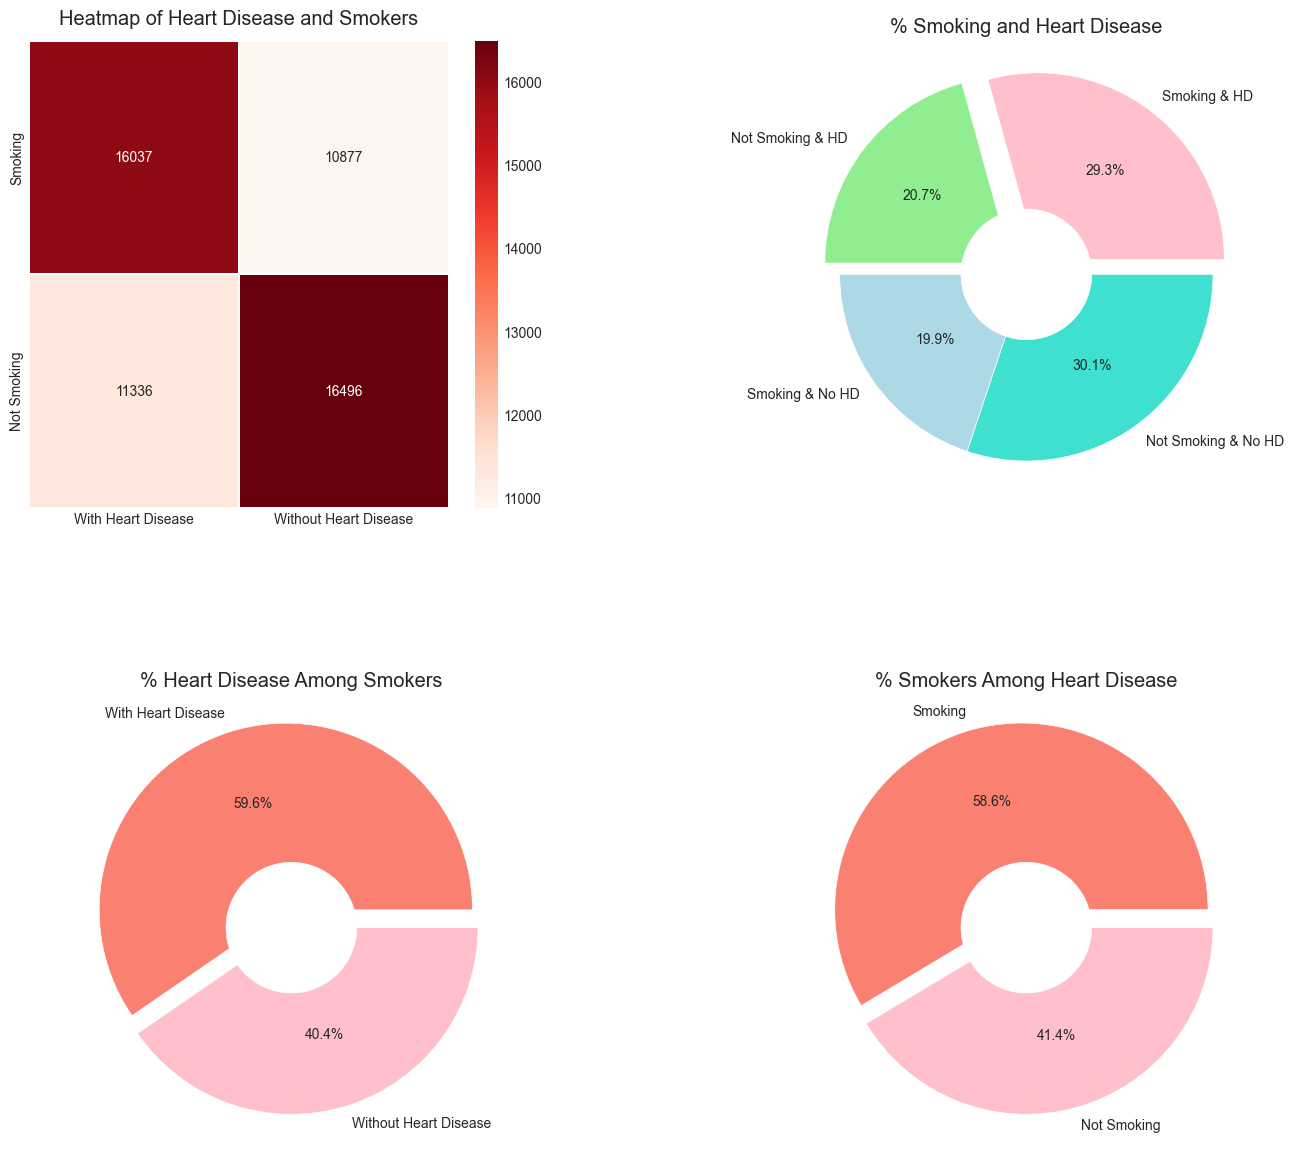

In [83]:
observ = VizData(df_append, "HeartDisease", "With Heart Disease", "Without Heart Disease")
smoking_idx = ["Smoking", "Not Smoking"]
smoking_all_labs = ["Smoking & HD",
                    "Not Smoking & HD",
                    "Smoking & No HD",
                    "Not Smoking & No HD"]
observ.binviz("Smoking", smoking_idx,
              "Heatmap of Heart Disease and Smokers",
              smoking_all_labs,
              don_all_title= "% Smoking and Heart Disease",
              don_one_title= "% Heart Disease Among Smokers",
              don_two_title= "% Smokers Among Heart Disease")

In [85]:
!pip install researchpy
import researchpy as rp

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.0/9.0 MB 11.7 MB/s eta 0:00:00
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [86]:
rp.ttest(group1= HD['BMI'], group1_name= "Heart Disease",
         group2= nHD_sample['BMI'], group2_name= "No Heart Disease")

C:\Users\valse\AppData\Roaming\Python\Python311\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(           Variable        N       Mean        SD        SE  95% Conf.  \
 0     Heart Disease  27373.0  29.401592  6.577151  0.039754  29.323673   
 1  No Heart Disease  27373.0  28.245836  6.342830  0.038337  28.170693   
 2          combined  54746.0  28.823714  6.486786  0.027724  28.769375   
 
     Interval  
 0  29.479511  
 1  28.320980  
 2  28.878053  ,
                                  Independent t-test     results
 0  Difference (Heart Disease - No Heart Disease) =       1.1558
 1                             Degrees of freedom =   54744.0000
 2                                              t =      20.9271
 3                          Two side test p value =       0.0000
 4                         Difference < 0 p value =       1.0000
 5                         Difference > 0 p value =       0.0000
 6                                      Cohen's d =       0.1789
 7                                      Hedge's g =       0.1789
 8                                 Glass's delta

In [89]:
stats.ttest_ind( HD['BMI'], nHD_sample['BMI'])

Ttest_indResult(statistic=20.927094435127927, pvalue=7.280590649090662e-97)

In [97]:
df_pys = df[df['PhysicalActivity']=='Yes'].sample(n=1000, random_state=1)
df_pys_n = df[df['PhysicalActivity']=='No'].sample(n=1000, random_state=1)

In [99]:
rp.ttest(group1= df_pys['MentalHealth'], group1_name= "Active",
         group2= df_pys_n['MentalHealth'], group2_name= "non-Active")

C:\Users\valse\AppData\Roaming\Python\Python311\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(     Variable       N   Mean        SD        SE  95% Conf.  Interval
 0      Active  1000.0  3.732  7.859895  0.248552   3.244257  4.219743
 1  non-Active  1000.0  4.992  9.393518  0.297049   4.409088  5.574912
 2    combined  2000.0  4.362  8.681454  0.194123   3.981295  4.742705,
                     Independent t-test    results
 0  Difference (Active - non-Active) =     -1.2600
 1                Degrees of freedom =   1998.0000
 2                                 t =     -3.2531
 3             Two side test p value =      0.0012
 4            Difference < 0 p value =      0.0006
 5            Difference > 0 p value =      0.9994
 6                         Cohen's d =     -0.1455
 7                         Hedge's g =     -0.1454
 8                    Glass's delta1 =     -0.1603
 9                  Point-Biserial r =     -0.0726)

In [101]:
stats.ttest_ind( df_pys_n['MentalHealth'],df_pys['MentalHealth'])

Ttest_indResult(statistic=3.2531311257963353, pvalue=0.0011604400347736056)

In [102]:
stats.t.ppf(q=0.975, df=30000) # t value 5 % significance

1.9600430633839345

In [103]:
stats.t.ppf(q=0.95, df=754) # t value 10 % significance level

1.6468770413228038